In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import re

In [17]:
#testando a leitura dos dados
cd = pd.read_csv('desafio_indicium_imdb.csv')
cd.head()
print(cd.info())
print(cd.columns.tolist())
cd = cd.drop(columns=['Unnamed: 0'])


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     999 non-null    int64  
 1   Series_Title   999 non-null    object 
 2   Released_Year  999 non-null    object 
 3   Certificate    898 non-null    object 
 4   Runtime        999 non-null    object 
 5   Genre          999 non-null    object 
 6   IMDB_Rating    999 non-null    float64
 7   Overview       999 non-null    object 
 8   Meta_score     842 non-null    float64
 9   Director       999 non-null    object 
 10  Star1          999 non-null    object 
 11  Star2          999 non-null    object 
 12  Star3          999 non-null    object 
 13  Star4          999 non-null    object 
 14  No_of_Votes    999 non-null    int64  
 15  Gross          830 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 125.0+ KB
None
['Unnamed: 0', 'Series_Title', 'R

In [18]:
#Ajustando os dados

cd.info()
cd.describe()
cd.isnull().sum()


cd['Runtime'] = cd['Runtime'].str.replace('min','',regex=True).str.strip()
cd['Runtime'] = pd.to_numeric(cd['Runtime'], errors='coerce')
cd['Released_Year'] = pd.to_numeric(cd['Released_Year'], errors='coerce')
cd['IMDB_Rating'] = pd.to_numeric(cd['IMDB_Rating'], errors='coerce')
cd['Meta_score'] = pd.to_numeric(cd['Meta_score'], errors='coerce')
cd['Gross'] = cd["Gross"].astype(str).str.replace('[,]', '', regex=True)
cd['Gross'] = pd.to_numeric(cd['Gross'], errors='coerce')

cd[cd.select_dtypes(include=['int64', 'float64']).columns] = cd.select_dtypes(include=['int64', 'float64']).fillna(0)
cd[cd.select_dtypes(include=['object']).columns] = cd.select_dtypes(include=['object']).fillna('Nada')

cd['Certificate'] = cd['Certificate'].fillna('Nada')

print(cd['Runtime'].value_counts())
print('===')
print(cd['Released_Year'].value_counts())
print('===')
print(cd['IMDB_Rating'].value_counts())
print('===')
print(cd['Meta_score'].value_counts())
print('===')
print(cd['No_of_Votes'].value_counts())
print('===')
print(cd['Gross'].value_counts())
print('===')
print(cd['Genre'].value_counts())
print('===')
print(cd['Certificate'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Series_Title   999 non-null    object 
 1   Released_Year  999 non-null    object 
 2   Certificate    898 non-null    object 
 3   Runtime        999 non-null    object 
 4   Genre          999 non-null    object 
 5   IMDB_Rating    999 non-null    float64
 6   Overview       999 non-null    object 
 7   Meta_score     842 non-null    float64
 8   Director       999 non-null    object 
 9   Star1          999 non-null    object 
 10  Star2          999 non-null    object 
 11  Star3          999 non-null    object 
 12  Star4          999 non-null    object 
 13  No_of_Votes    999 non-null    int64  
 14  Gross          830 non-null    object 
dtypes: float64(2), int64(1), object(12)
memory usage: 117.2+ KB
Runtime
100    23
130    23
129    22
101    22
113    22
       ..
193     1
70  

In [19]:
#Ajustando o uso de %

for col in cd.select_dtypes(include=['object', 'int64', 'float64']).columns:
    print(f'n--- {col} ---')
    freq =  cd[col].value_counts().to_frame("Porcentagem")
    freq['%'] = (freq['Porcentagem'] / freq['Porcentagem'].sum() * 100).round(2)
    print(freq.head())

n--- Series_Title ---
                  Porcentagem    %
Series_Title                      
Drishyam                    2  0.2
Falling Down                1  0.1
Cidade de Deus              1  0.1
The Muppet Movie            1  0.1
The Warriors                1  0.1
n--- Released_Year ---
               Porcentagem    %
Released_Year                  
2014.0                  32  3.2
2004.0                  31  3.1
2009.0                  29  2.9
2013.0                  28  2.8
2016.0                  28  2.8
n--- Certificate ---
             Porcentagem      %
Certificate                    
U                    234  23.42
A                    196  19.62
UA                   175  17.52
R                    146  14.61
Nada                 101  10.11
n--- Runtime ---
         Porcentagem    %
Runtime                  
100               23  2.3
130               23  2.3
129               22  2.2
101               22  2.2
113               22  2.2
n--- Genre ---
                        Por

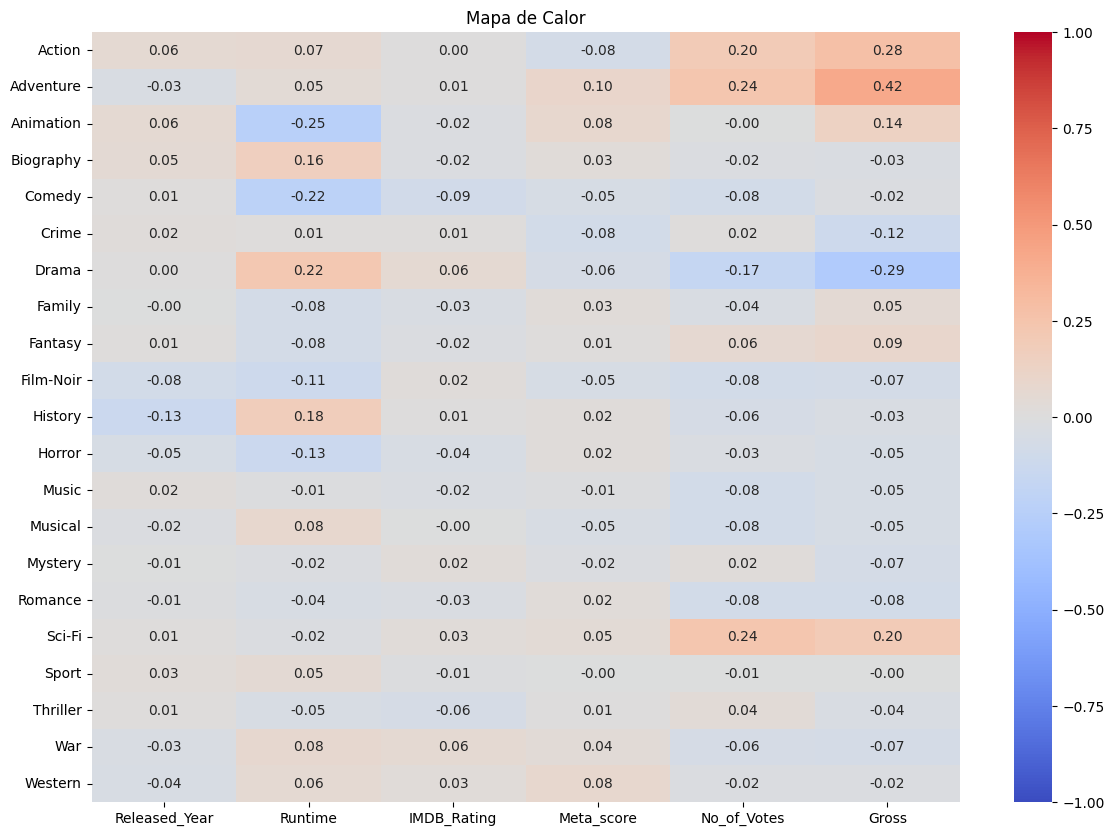

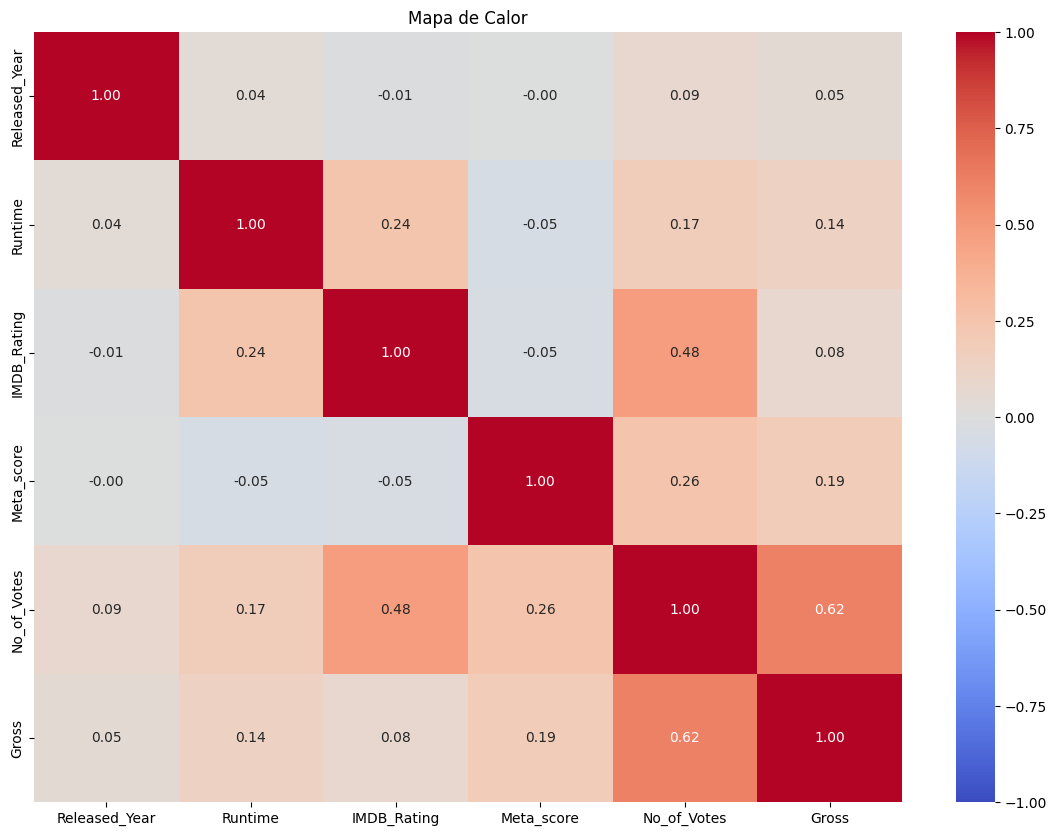

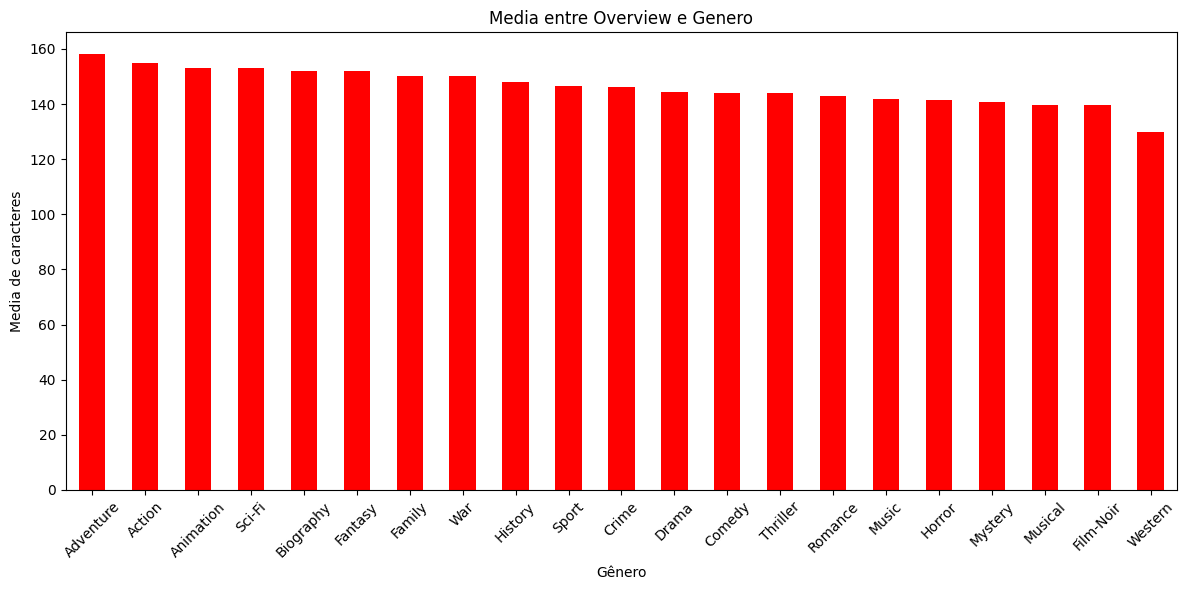

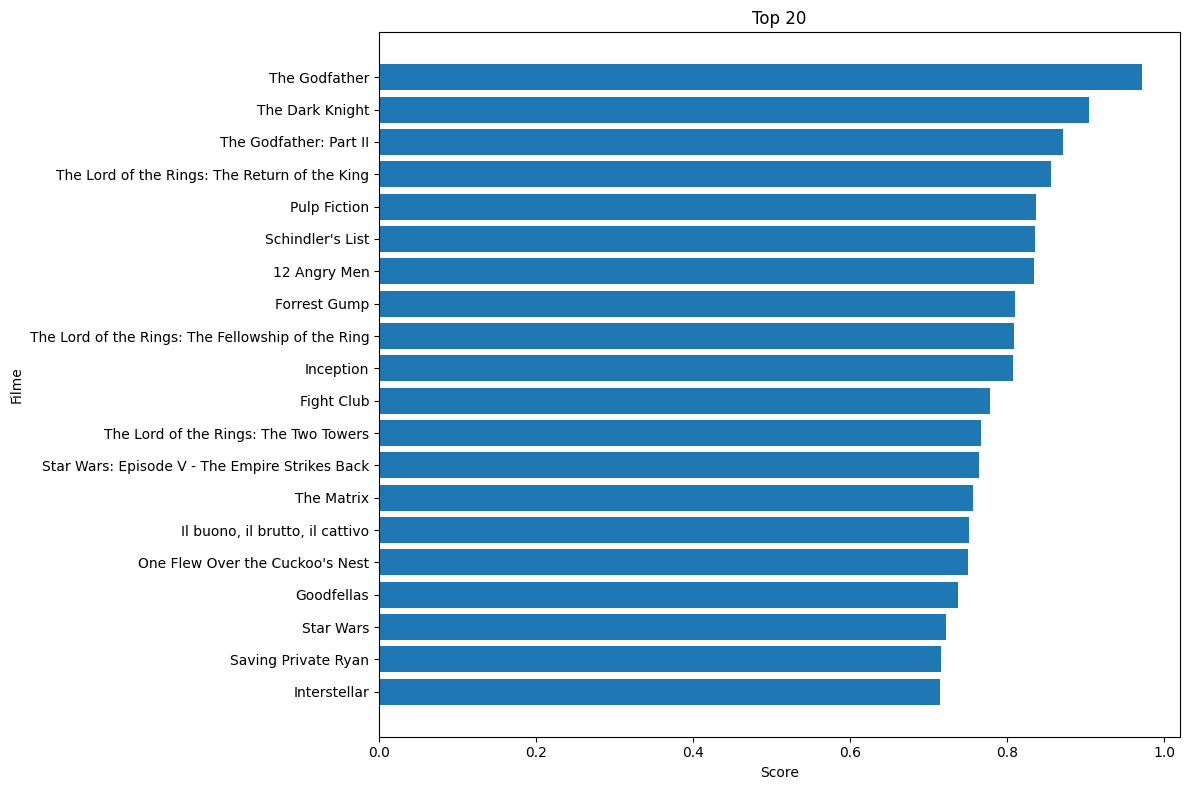

In [20]:
#Ajustando graficos para relações

num = cd.select_dtypes(include=['int64', 'float64']).drop(columns=['Score', 'Gross_log', 'Gross_m', 'rating_m', 'Rating_m', 'Overview_tamanho'],errors='ignore')
corrN = num.corr()

cd['Overview_tamanho'] = cd['Overview'].astype(str).str.len()

corte_g = cd.assign(corte_g =cd['Genre'].str.split(', ')).explode('corte_g')
genre = cd['Genre'].astype(str).str.get_dummies(sep=', ')
genre = genre.loc[:, genre.nunique() > 1]

gen_over = corte_g.groupby('corte_g')['Overview_tamanho'].mean().sort_values(ascending=False)

mix = pd.concat([num, genre], axis=1)

corrM = mix.corr()
mixL = corrM.loc[genre.columns, num.columns]

plt.figure(figsize=(14,10))
sns.heatmap(mixL,annot=True,cmap='coolwarm', fmt='.2f', vmin =-1, vmax= 1)
plt.title("Mapa de Calor")
plt.show()

plt.figure(figsize=(14,10))
sns.heatmap(corrN,annot=True,cmap='coolwarm', fmt='.2f', vmin =-1, vmax= 1)
plt.title("Mapa de Calor")
plt.show()

plt.figure(figsize=(12,6))
gen_over.plot(kind='bar', color='red')
plt.title('Media entre Overview e Genero')
plt.ylabel('Media de caracteres')
plt.xlabel('Gênero')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#Ajuste para o top 100

cd['Gross_log'] = np.log1p(cd['Gross'])

def minmax(s):
    s = s.astype(float)
    mn, mx = s.min(), s.max()
    return (s-mn)/ (mx - mn) if pd.notna(mn) and mx != mn else s*0

cd['Rating_m'] = minmax(cd['IMDB_Rating'])
cd['Gross_m'] = minmax(cd['Gross_log'])

cd['Score'] = 0.7*cd['Rating_m'] + 0.3*cd['Gross_m']

top = cd.sort_values('Score', ascending=False).head(99)


plot_df = top.head(20).copy()


plot_df = plot_df.iloc[::-1]

plt.figure(figsize=(12,8))
plt.barh(plot_df['Series_Title'], plot_df['Score'])
plt.xlabel('Score')
plt.ylabel('Filme')
plt.title('Top 20')
plt.tight_layout()
plt.show()


In [21]:
#Explicações do desafio

print('1 - é possivel dar algumas hipoteses pelas relações pelos graficos demonstrados, como o numero de votos acaba sendo o dado mais importante no sucesso  de algum filme;Pois ele se mostra importante tanto no meta score, IMDB rating e diretamente relacionado ao lucro(Gross) do filme!\nTambém pode se inferir que filmes do gênero: ação, aventura e sci-fi tendem a ter mais lucro e votos em comparação a outros gêneros.\nAssim como o ano que o filme foi lançado tem a menor chance de interferir no sucesso de um filme, diferente do tamanho do filme que pode alterar o IMDB Rating\n')

print('===\n')

print('2\na) Eu recomendaria "The Godfather" e "The Dark Knight", pois são os melhores avaliados tanto no IMDB quanto no meta, alem de ter a maior quantidade de votos, fazendo eles serem escolhas bem seguras para recomendar para um desconhecido\n\nb)O Numero de votos é um fator altissimo no faturamento de um filme, afinal os votos são as pessoas que foram ver o filme, porem não se pode jogar fora que o Meta tambem é um fator, mesmo que não seja o maior\n\nc) É possivel se retirar que a coluna overview demonstra menos importancia no quesito geral do filme em comparação aos outros dados sendo um dos fatores que menos importa para o lucro do filme;\n\nSim, os numeros de caracteres de cada gênero são muito parecidas entre si, porem animação, ação e aventura contem um numero medio de caracteres maiores que os outros por uma pequena margem, podendo se inferir que estes gêneros contem mais explicações em seus overviews')

1 - é possivel dar algumas hipoteses pelas relações pelos graficos demonstrados, como o numero de votos acaba sendo o dado mais importante no sucesso  de algum filme;Pois ele se mostra importante tanto no meta score, IMDB rating e diretamente relacionado ao lucro(Gross) do filme!
Também pode se inferir que filmes do gênero: ação, aventura e sci-fi tendem a ter mais lucro e votos em comparação a outros gêneros.
Assim como o ano que o filme foi lançado tem a menor chance de interferir no sucesso de um filme, diferente do tamanho do filme que pode alterar o IMDB Rating

===

2
a) Eu recomendaria "The Godfather" e "The Dark Knight", pois são os melhores avaliados tanto no IMDB quanto no meta, alem de ter a maior quantidade de votos, fazendo eles serem escolhas bem seguras para recomendar para um desconhecido

b)O Numero de votos é um fator altissimo no faturamento de um filme, afinal os votos são as pessoas que foram ver o filme, porem não se pode jogar fora que o Meta tambem é um fator, m

In [22]:
#Desafio 3; Previsão da nota do IMDB

df = cd.copy()
IMDB = 'IMDB_Rating'
numericos = [c for c in ['Released_Year', 'Runtime', 'Meta_score', 'Gross', 'No_of_Votes', 'Overview_tamanho']if c in df.columns]
Objetos = [c for c in [ 'genre'] if c in df.columns]

if 'Genre' in df.columns:
    dummies = df['Genre'].astype(str).str.get_dummies(sep=', ')
else:
    dummies = pd.DataFrame(index=df.index)

x_numericos = df[numericos]
X = pd.concat([x_numericos, dummies], axis=1).fillna(0)
y = df['IMDB_Rating']

X = X.copy()
X.insert(0, 'Interceptar', 1.0)

rng = np.random.default_rng(40)
idx = np.arange(len(X))
rng.shuffle(idx)

Tamanho_teste = int (0.2 * len(X))
Teste_idx = idx[:Tamanho_teste]
Treino_idx = idx[Tamanho_teste:]

X_treino, y_treino = X.iloc[Treino_idx], y.iloc[Treino_idx]
X_teste,  y_teste = X.iloc[Teste_idx],  y.iloc[Teste_idx]

treinar = ~y_treino.isna()
testar = ~y_teste.isna()

X_treino, y_treino = X_treino[treinar], y_treino[treinar]
X_treino, y_treino = X_treino[treinar], y_treino[treinar]


print("Shape treino:", X_treino.shape, " | Shape teste:", X_teste.shape)

#Treinando modelo linear

beta, residuals, rank, s = np.linalg.lstsq(X_treino.values, y_treino.values, rcond=None)

y_pred_treino = X_treino.values @ beta
y_pred_teste  = X_teste.values  @ beta


def rmse(y_true, y_hat):
    return float(np.sqrt(np.mean((y_true - y_hat)**2)))

def r2(y_true, y_hat):
    ss_res = float(np.sum((y_true - y_hat)**2))
    ss_tot = float(np.sum((y_true - np.mean(y_true))**2))
    return 1 - ss_res/ss_tot if ss_tot != 0 else np.nan

print(f"Treino -> RMSE: {rmse(y_treino, y_pred_treino):.2f} | R²: {r2(y_treino, y_pred_treino):.2f}")
print(f"Teste  -> RMSE: {rmse(y_teste,  y_pred_teste):.2f} | R²: {r2(y_teste,  y_pred_teste):.2f}")


feature_cols = X.columns.copy()
beta_vec = beta.copy()

def _to_num_runtime(x):
    if pd.isna(x): return np.nan
    s = str(x)
    m = re.search(r'\d+', s)        # aceita "128 min" ou "128"
    return float(m.group()) if m else np.nan

def _to_num_gross(x):
    if pd.isna(x): return np.nan
    s = str(x).replace('$','').replace(',','').strip()
    try:
        return float(s)
    except:
        return np.nan

#Deus me ajude;Pois esse codigo não está

def preparar_X_novo(df_novo: pd.DataFrame) -> pd.DataFrame:
    tmp = df_novo.copy()

    if 'Runtime' in tmp.columns:
        tmp['Runtime'] = tmp['Runtime'].apply(_to_num_runtime)
    if 'Gross' in tmp.columns:
        tmp['Gross'] = tmp['Gross'].apply(_to_num_gross)

    for col in ['Meta_score','No_of_Votes','Released_Year','IMDB_Rating']:
        if col in tmp.columns:
            tmp[col] = pd.to_numeric(tmp[col], errors='coerce')

    if ('Overview_tamanho' in numericos) and ('Overview_tamanho' not in tmp.columns):
        if 'Overview' in tmp.columns:
            tmp['Overview_tamanho'] = tmp['Overview'].astype(str).str.len()
        else:
            tmp['Overview_tamanho'] = np.nan

    parts = []
    if 'Genre' in df.columns and 'Genre' in tmp.columns:
        g_new = tmp['Genre'].astype(str).str.get_dummies(sep=', ')
        parts.append(g_new)
    if 'Certificate' in df.columns and 'Certificate' in tmp.columns:
        c_new = pd.get_dummies(tmp[['Certificate']], dummy_na=False)
        parts.append(c_new)

    dummies_new = pd.concat(parts, axis=1) if parts else pd.DataFrame(index=tmp.index)

    Xn = pd.concat([tmp[[c for c in numericos if c in tmp.columns]], dummies_new],
                   axis=1).fillna(0)

    Xn = Xn.reindex(columns=feature_cols.drop('Interceptar'), fill_value=0)

    Xn.insert(0, 'Interceptar', 1.0)
    return Xn

def prever_filmes(df_novos: pd.DataFrame) -> np.ndarray:
    X_new = preparar_X_novo(df_novos)
    return X_new.values @ beta_vec

filme_teorico = pd.DataFrame([{
   'Series_Title': 'The Shawshank Redemption',
   'Released_Year': '1994',
   'Certificate': 'A',
   'Runtime': '142 min',
   'Genre': 'Drama',
   'Overview': 'Two imprisoned men bond over a number of years, finding solace and eventual redemption through acts of common decency.',
   'Meta_score': 80.0,
   'Director': 'Frank Darabont',
   'Star1': 'Tim Robbins',
   'Star2': 'Morgan Freeman',
   'Star3': 'Bob Gunton',
   'Star4': 'William Sadler',
   'No_of_Votes': 2343110,
   'Gross': '28,341,469'}

])

pred = prever_filmes(filme_teorico)


print('\n3 - Eu utilizer as variaveis numericas como "release year", "runtime", "meta_score", "Gross" e "No_of_votes" para criar uma media entre elas as convertendo para valores numericos para facilitar o calculo, assim como "overview", tendo que o transformar em apenas numerico sendo a quantidade de letras que contem, fazendo assim outra media, assim como transformando "Genre" e "Certificate" em dummies para possibilitar o uso deles como variaveis junto a Int64 e Float64; Com o ponto alvo do teste ser a nota "IMDB_Rating"\n\nEste é um tipo de problema de regressão, pois é uma variavel continua, indo de 0 a 10\n\nUtilizei Regressão linear pois ele é mais facil de interperetar, rapido de treinar e me gera coeficientes claros entre variaveis, porem por ser um sistema linear, pode não capturar efeitos não lineares ou interações complexas entre as variaves\n\nEu escolhi Root mean Squared Error pois ele avalia o erro medio de previsão na escala do IMDB e R² pois indica a variação da nota; ambas são capazes de interpretar o desempenho de forma pratica')
print("\n4 - Previsão da nota IMDb do filme 'The Shawshank Redemption:", f"{pred[0]:.2f}")

Shape treino: (800, 28)  | Shape teste: (199, 28)
Treino -> RMSE: 0.21 | R²: 0.38
Teste  -> RMSE: 0.22 | R²: 0.41

3 - Eu utilizer as variaveis numericas como "release year", "runtime", "meta_score", "Gross" e "No_of_votes" para criar uma media entre elas as convertendo para valores numericos para facilitar o calculo, assim como "overview", tendo que o transformar em apenas numerico sendo a quantidade de letras que contem, fazendo assim outra media, assim como transformando "Genre" e "Certificate" em dummies para possibilitar o uso deles como variaveis junto a Int64 e Float64; Com o ponto alvo do teste ser a nota "IMDB_Rating"

Este é um tipo de problema de regressão, pois é uma variavel continua, indo de 0 a 10

Utilizei Regressão linear pois ele é mais facil de interperetar, rapido de treinar e me gera coeficientes claros entre variaveis, porem por ser um sistema linear, pode não capturar efeitos não lineares ou interações complexas entre as variaves

Eu escolhi Root mean Squared Err

In [23]:
import pickle

modelo = {
    "beta": beta,                     
    "feature_cols": list(feature_cols), 
    "numericos": numericos              
}

with open("modelo_imdb.pkl", "wb") as f:
    pickle.dump(modelo, f)

print("Modelo salvo como modelo_imdb.pkl")


Modelo salvo como modelo_imdb.pkl
